# NASHVILLE ROCK'N'ROLL FULL MARATHONS ANALYSIS

---

### Years 2016, 2017, 2018, 2019

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import time

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [2]:
f16 = pd.read_csv('./data/full_2016.csv', usecols=['Name', 'Time'])
f17 = pd.read_csv('./data/full_2017.csv', usecols=['Name', 'Time'])
f18 = pd.read_csv('./data/full_2018.csv', usecols=['Name', 'Time'])
f19 = pd.read_csv('./data/full_2019.csv', usecols=['Name', 'Time'])

---

### Convert Times and Clean/Split up non-Finishers

 - `f16_non` = Marathoners who did NOT finish
 - `f16_fin` = Marathoners who finished

In [3]:
f16['Seconds'] = f16['Time'].apply(lambda x : pd.to_timedelta(x).total_seconds())
f17['Seconds'] = f17['Time'].apply(lambda x : pd.to_timedelta(x).total_seconds())
f18['Seconds'] = f18['Time'].apply(lambda x : pd.to_timedelta(x).total_seconds())
f19['Seconds'] = f19['Time'].apply(lambda x : pd.to_timedelta(x).total_seconds())

In [4]:
f16_non = f16[f16['Seconds'] == 0.0]
f16_fin = f16[f16['Seconds'] != 0.0]

f17_non = f17[f17['Seconds'] == 0.0]
f17_fin = f17[f17['Seconds'] != 0.0]

f18_non = f18[f18['Seconds'] == 0.0]
f18_fin = f18[f18['Seconds'] != 0.0]

f19_non = f19[f19['Seconds'] == 0.0]
f19_fin = f19[f19['Seconds'] != 0.0]

---

##  FULL Marathon Plotting

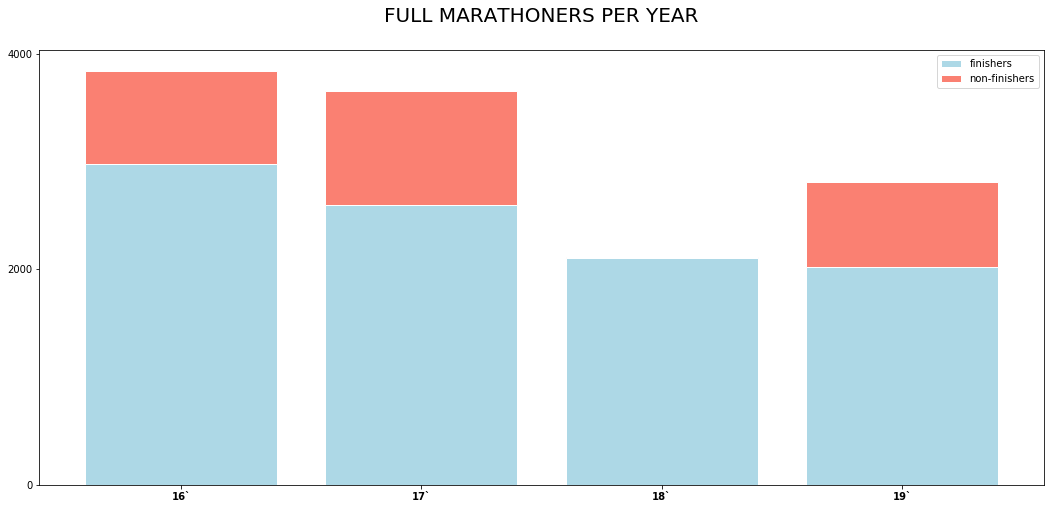

In [5]:
r = ['16`','17`','18`','19`']

years_fin = [len(f16_fin),len(f17_fin),len(f18_fin),len(f19_fin)] 
years_non_fin = [len(f16_non),len(f17_non),len(f18_non),len(f19_non)]

fig, ax = plt.subplots(figsize=(18, 8));

ax1 = plt.bar(r, 
              years_fin, 
              color='lightblue', 
              edgecolor='white', 
              width=.8,
              label='finishers'
             );
ax2 = plt.bar(r, 
              years_non_fin, 
              bottom=years_fin, 
              color='salmon', 
              edgecolor='white', 
              width=.8,
              label='non-finishers'
        );


plt.title('Full Marathoners Per Year\n'.upper(), fontsize=20);
plt.yticks([0, 2000, 4000]);
plt.xticks(r, fontweight='bold');
plt.legend(handles=[ax1, ax2]);

plt.savefig('./img_data/full_fin_non-fin_all_years');

---

## FULL Marathon time distributions

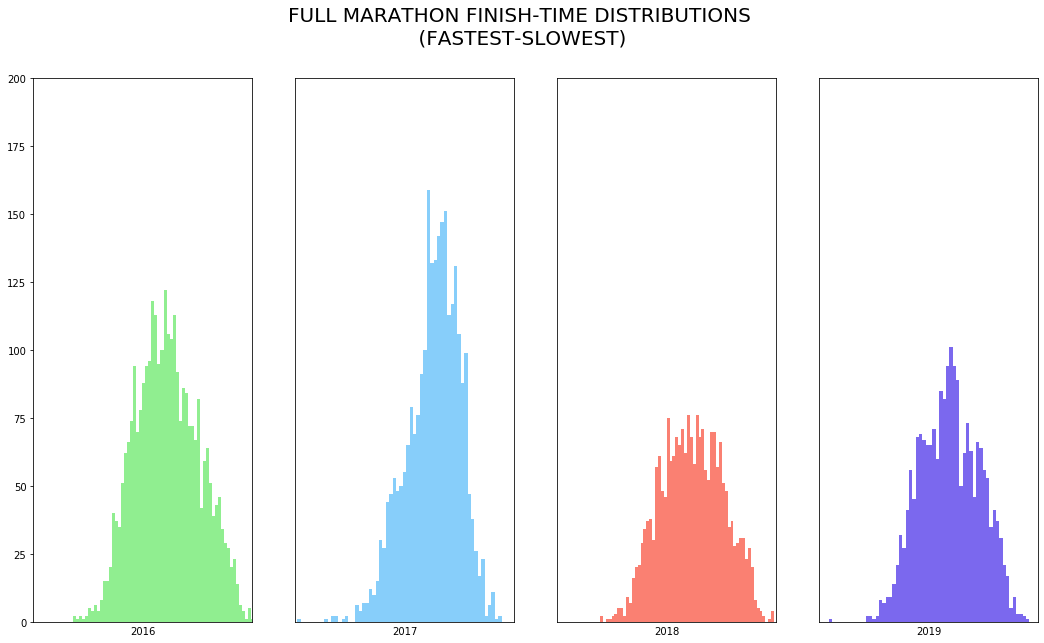

In [8]:
fig = plt.figure(figsize=(18, 10));
fig.suptitle('FULL Marathon Finish-time Distributions\n (Fastest-Slowest)\n'.upper(), size=20);

# Generate a box plot of the fare prices for the First passenger class
ax1 = fig.add_subplot(141);
ax1.hist(x=f16_fin['Seconds'].values,bins=60, color='lightgreen');
ax1.set_xlabel('2016')
# ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_ylim([0, 200])
ax1.set_xlim([5000, 25000])

ax2 = fig.add_subplot(142);
ax2.hist(x=f17_fin['Seconds'].values,bins=60, color='lightskyblue');
ax2.set_xlabel('2017')
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_ylim([0, 200])
ax2.set_xlim([5000, 25000])

ax3 = fig.add_subplot(143);
ax3.hist(x=f18_fin['Seconds'].values,bins=60, color='salmon');
ax3.set_xlabel('2018')
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_ylim([0, 200])
ax3.set_xlim([5000, 25000])

ax4 = fig.add_subplot(144);
ax4.hist(x=f19_fin['Seconds'].values,bins=60, color='mediumslateblue');
ax4.set_xlabel('2019')
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_ylim([0, 200])
ax4.set_xlim([5000, 25000])

plt.savefig('./img_data/full_fin_times_distributions');